# Hospital readmission of patients with diabetes using Machine Learning Classification Methods

## Dataset Description

VARIABLE NAMES: DESCRIPTION

Encounter ID Unique identifier of an encounter

Patient number Unique identifier of a patient

Race Values: Caucasian, Asian, African American, Hispanic, and other

Gender Values: male, female, and unknown/invalid

Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight Weight in pounds

Admission type Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

Discharge disposition Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital Integer number of days between admission and discharge

Payer code Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

Medical specialty Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures Number of lab tests performed during the encounter

Number of procedures Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications Number of distinct generic names administered during the encounter

Number of outpatient visits Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1 The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2 Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3 Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses Number of diagnoses entered to the system 0%

Glucose serum test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

Readmitted Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

### Installing and importing libraries

In [1]:
import numpy as np
import pandas as pd



##### Data Visualisation

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

##### Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

##### Modeling

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score

from sklearn.neighbors import LocalOutlierFactor






## Data Preprocessing

### Reading dataset

In [5]:
df = pd.read_csv('C:/Users/stama/Desktop/FINAL PROJECT/dataset_diabetes/diabetic_data.csv')
df.replace('?',np.nan,inplace=True)
pd.set_option('display.max_rows', 120)



In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [7]:
df.shape

(101766, 50)

In [8]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### Missing Values

The concept of missing values is important to understand in order to successfully manage data.  If the missing values are not handled properly by the researcher, then he/she may end up drawing an inaccurate inference about the data.  Due to improper handling, the result obtained by the researcher will differ from ones where the missing values are present.



First we need to check the extent of the missing values in all variables  by creating a heatmap


In [9]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

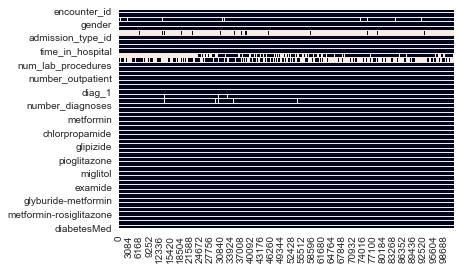

In [10]:
sns.heatmap(df.isnull().T, cbar=False);


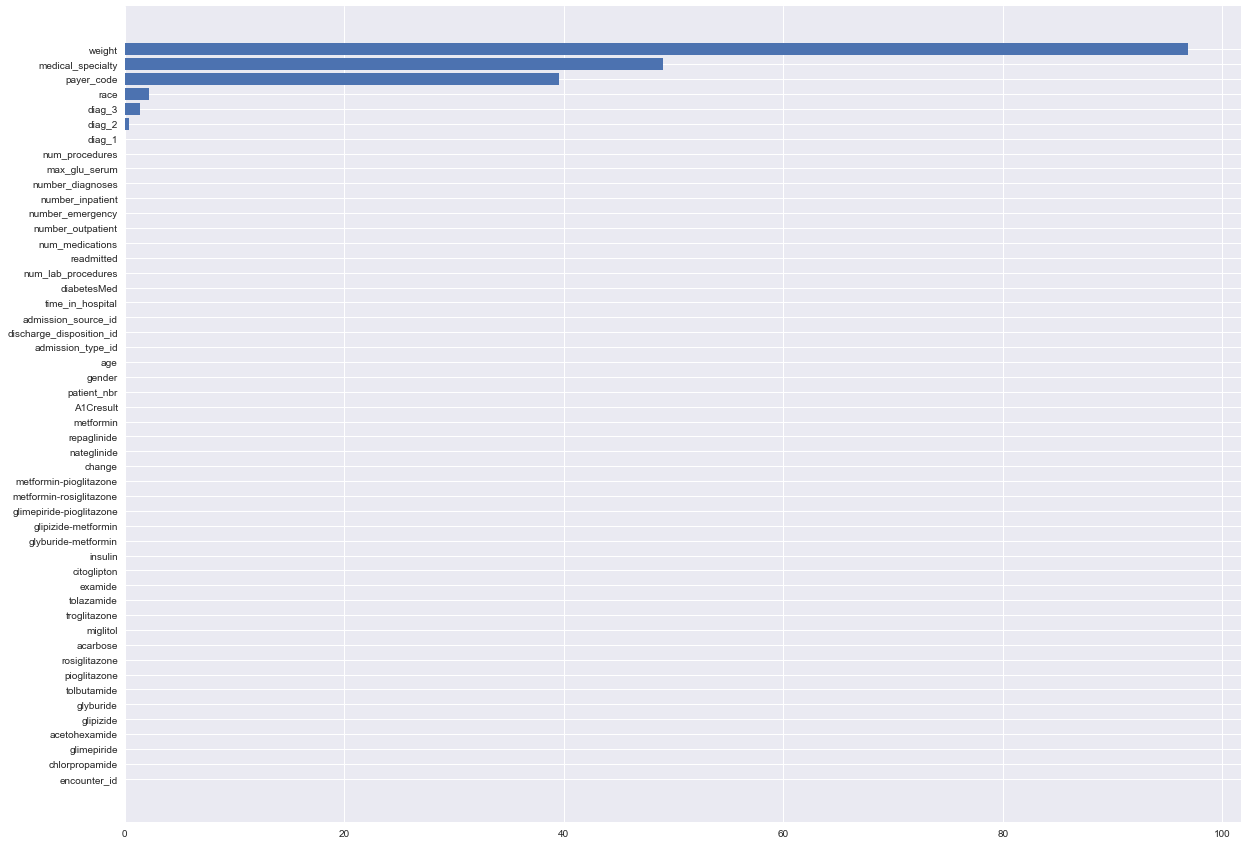

In [11]:
plt.figure(figsize=(20,15))
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

From the graph we can see that the variables "weight", "medical specialty", and "payer code" have several missing values, as the percentage of missing values exceeds 90%, 50% and 38% respectively. For that reason these variables will be dropped from the analysis.

In [12]:
df.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)

#### Handling missing Values 

Percentage of missing values by variable

In [13]:
df.isnull().sum()/len(df)

encounter_id                0.000000
patient_nbr                 0.000000
race                        0.022336
gender                      0.000000
age                         0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
g

From the graph above we observe that there are misssing values on variables "race", "diag_1", "diag_2" and "diag_3". The percentage of the missing values for each variable is less than 3% and in combination of the figh volume of observations (101766) we can drop the rows with the missing values

##### Gender unknown/invalid

Upon checking unique values for gender, the unknown/invalid will be treated as NA and will be removed.

In [14]:
df=df[df['gender']!='Unknown/Invalid']
df.dropna(inplace=True)

#### Checking again the missing values 

In [15]:
df.isnull().sum()/len(df)

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglit

No missing values 

### Removing Identifiers

https://libguides.library.usyd.edu.au/datapublication/desensitise-data
Remove Identifiers

In [16]:
df.drop(['encounter_id','patient_nbr','admission_type_id',
         'discharge_disposition_id','admission_source_id'],axis=1,inplace=True)

In [17]:
df.shape

(98052, 42)

### Removing 2 variables-medicines

I am removing two variables from the dataframe as they have only the value "No". So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables

In [18]:
df = df.drop(['citoglipton', 'examide'], axis = 1)


In [19]:
df.shape

(98052, 40)

#### Determination of numeric variables

In [20]:
df.numerical_columns = ['num_medications',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses']

#### Determination of Categorical variables

In [21]:
df.categorical_columns = ['race', 'diag_3', 'diag_2', 'diag_1', 'tolazamide', 'glyburide', 'tolbutamide', 'pioglitazone',
  'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'acetohexamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
  'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'glipizide',
  'repaglinide', 'glimepiride', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
  'chlorpropamide', 'max_glu_serum', 'A1Cresult', 'metformin', 'nateglinide', 'readmitted']

### Remove ouliers

In [22]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])  # palette = rocket, Wistia
            count = count+1


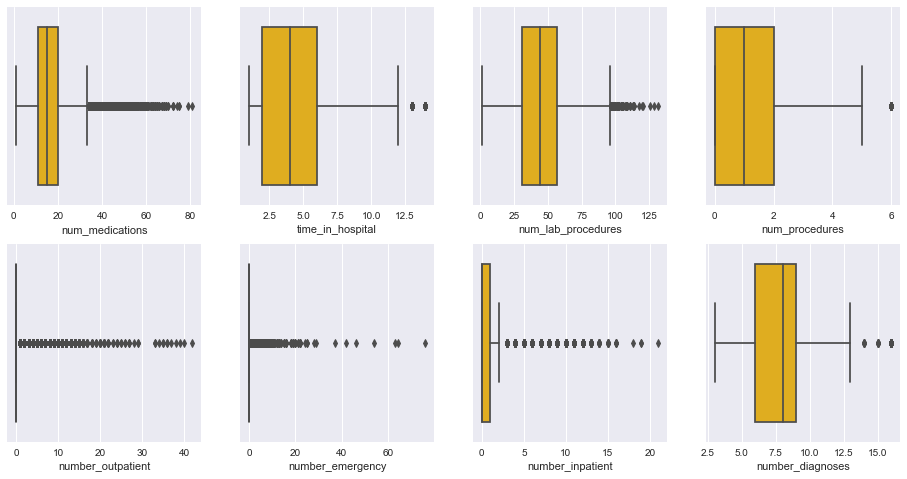

In [23]:
boxplot_for_outlier(df,df.numerical_columns)

In [24]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 2 , contamination = 0.1)
clf.fit_predict(df[df.numerical_columns])

array([ 1,  1,  1, ..., -1,  1,  1])

In [25]:
df_scores = clf.negative_outlier_factor_
df_scores[0:30]

array([-1.00000000e+00, -1.21803487e+00, -1.00000000e+00, -1.00000000e+00,
       -9.26776695e-01, -1.11237244e+00, -1.41421356e+00, -1.00000000e+00,
       -1.19553853e+00, -8.53553391e-01, -1.00000000e+00, -1.29289322e+00,
       -1.15973961e+00, -1.76881914e+00, -1.05511154e+00, -1.20710678e+00,
       -1.29289322e+00, -8.53553391e-01, -5.00000000e+09, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.15161269e+00, -1.05618622e+00,
       -1.07647405e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.10355339e+00, -9.14213562e-01])

In [26]:
np.sort(df_scores)[0:30]

array([-4.00000000e+10, -2.79110350e+10, -2.44948974e+10, -2.23606798e+10,
       -2.23606798e+10, -2.23536866e+10, -2.00000000e+10, -2.00000000e+10,
       -1.75000000e+10, -1.73205081e+10, -1.73205081e+10, -1.73205081e+10,
       -1.73205081e+10, -1.73205081e+10, -1.73205081e+10, -1.73205081e+10,
       -1.65659482e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10])

In [27]:
threshold_value = np.sort(df_scores)[2]

In [28]:
outlier_tf = df_scores > threshold_value
outlier_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [29]:
new_df = df[df_scores > threshold_value]

In [30]:
df[df_scores < threshold_value]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
93655,Caucasian,Female,[70-80),5,35,0,15,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101603,Caucasian,Female,[90-100),9,71,0,21,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Feature Engineering

### Diag_1, Diag_2, Diag_3 cleaning

Diseases are devided into categories by their number-code. The classification of the diseases is done by the table of ICD9. http://icd9.chrisendres.com/index.php?action=contents

In this case the variables "Diag_1", "Diag_2", "Diag_3" need to be cleaned as some values include characters along with numbers. So the chars need to be removed

In [31]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

In [32]:
df[diag_cols] = df[diag_cols].astype(float)

Diseases and Injuries Tabular Index
1. INFECTIOUS AND PARASITIC DISEASES (001-139)
2. NEOPLASMS (140-239)
3. ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS (240-279)
4. DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS (280-289)
5. MENTAL DISORDERS (290-319)
6. DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS (320-389)
7. DISEASES OF THE CIRCULATORY SYSTEM (390-459)
8. DISEASES OF THE RESPIRATORY SYSTEM (460-519)
9. DISEASES OF THE DIGESTIVE SYSTEM (520-579)
10. DISEASES OF THE GENITOURINARY SYSTEM (580-629)
11. COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM (630-679)
12. DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE (680-709)
13. DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE (710-739)
14. CONGENITAL ANOMALIES (740-759)
15. CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD (760-779)
16. SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS (780-799)
17. INJURY AND POISONING (800-999)

250 Diabetes mellitus

In [33]:
df.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [34]:
df.shape

(98052, 40)

#### Diagnosis Grouping

In [35]:
for col in diag_cols:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)


In [36]:
df.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [37]:
df.dropna(inplace=True)


In [38]:
df.shape

(98052, 40)

In [39]:
df.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### Dealing with Age

Dealing with age: There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. The previous study on this dataset used age categories as nominal variables, but we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [40]:
df["age"]

1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
5         [50-60)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 98052, dtype: object

In [41]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     25305
7     21809
9     16702
6     16697
5      9265
4      3548
10     2717
3      1478
2       466
1        65
Name: age, dtype: int64

In [42]:
df.head(10).T

,1,2,3,4,5,6,7,8,9,10
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,Female,Female,Male,Male,Male,Male,Male,Female,Female,Female
age,2,3,4,5,6,7,8,9,10,5
time_in_hospital,3,2,2,1,3,4,5,13,12,9
num_lab_procedures,59,11,44,51,31,70,73,68,33,47
num_procedures,0,5,1,0,6,1,0,2,3,2
num_medications,18,13,16,8,16,21,12,28,18,17
number_outpatient,0,2,0,0,0,0,0,0,0,0
number_emergency,0,0,0,0,0,0,0,0,0,0
number_inpatient,0,1,0,0,0,0,0,0,0,0


### Encoding Variables

Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [43]:
max_glu_serum_dict = {'None':0,
                      'Norm':100,
                      '>200':200,
                      '>300':300
                     }
df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_serum_dict)

In [44]:
A1Cresult_dict = {'None':0,
                  'Norm':5,
                  '>7':7,
                  '>8':8
                 }
df['A1Cresult'] = df['A1Cresult'].replace(A1Cresult_dict)


In [45]:
change_dict = {'No':-1,
               'Ch':1
              }
df['change'] = df['change'].replace(change_dict)

In [46]:
diabetesMed_dict = {'No':-1,
                    'Yes':1
                   }
df['diabetesMed'] = df['diabetesMed'].replace(diabetesMed_dict)

In [47]:
d21_feature_dict = {'Up':10,
                    'Down':-10,
                    'Steady':0,
                    'No':-20
                   }
d21_cols = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
for col in d21_cols:
    df[col] = df[col].replace(d21_feature_dict)


#### Encoding Outcome

Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [48]:
df['readmitted'].value_counts()


NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [49]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [50]:
df['readmitted'].value_counts()

0    86986
1    11066
Name: readmitted, dtype: int64

In [51]:
df.head(10)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,2,3,59,0,18,0,0,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,AfricanAmerican,Female,3,2,11,5,13,2,0,1,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,Caucasian,Male,4,2,44,1,16,0,0,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,Caucasian,Male,5,1,51,0,8,0,0,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0
5,Caucasian,Male,6,3,31,6,16,0,0,0,...,-20,0,-20,-20,-20,-20,-20,-1,1,0
6,Caucasian,Male,7,4,70,1,21,0,0,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0
7,Caucasian,Male,8,5,73,0,12,0,0,0,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
8,Caucasian,Female,9,13,68,2,28,0,0,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0
9,Caucasian,Female,10,12,33,3,18,0,0,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0
10,AfricanAmerican,Female,5,9,47,2,17,0,0,0,...,-20,0,-20,-20,-20,-20,-20,-1,1,0


In [52]:
cat_cols = list(df.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    df = pd.concat([df.drop(col, axis=1)], axis=1)


In [53]:
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,3,59,0,18,0,0,0,9,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,3,2,11,5,13,2,0,1,6,0,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,4,2,44,1,16,0,0,0,7,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,5,1,51,0,8,0,0,0,5,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0
5,6,3,31,6,16,0,0,0,9,0,...,-20,0,-20,-20,-20,-20,-20,-1,1,0


In [54]:

df.to_csv('C:/Users/stama/Desktop/FINAL PROJECT/dataset_diabetes/processed_diabetic_data.csv', index = False)


## Visualisation

#### Scaterplots for correlation between our independent and dependent variable

#### Distribution of readmission

Text(0.5, 1.0, 'Distrinution of Readmission')

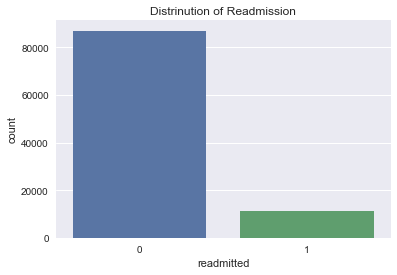

In [55]:
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')


#### Time in Hospital and Readmission


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

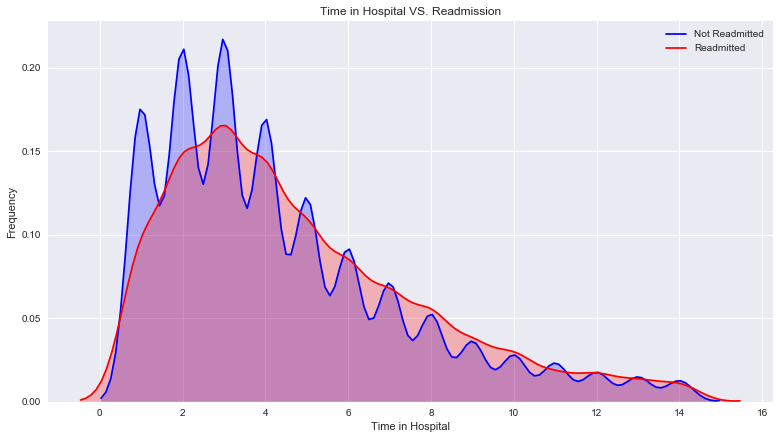

In [56]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

#### Age and Readmission


Text(0.5, 1.0, 'Age of Patient VS. Readmission')

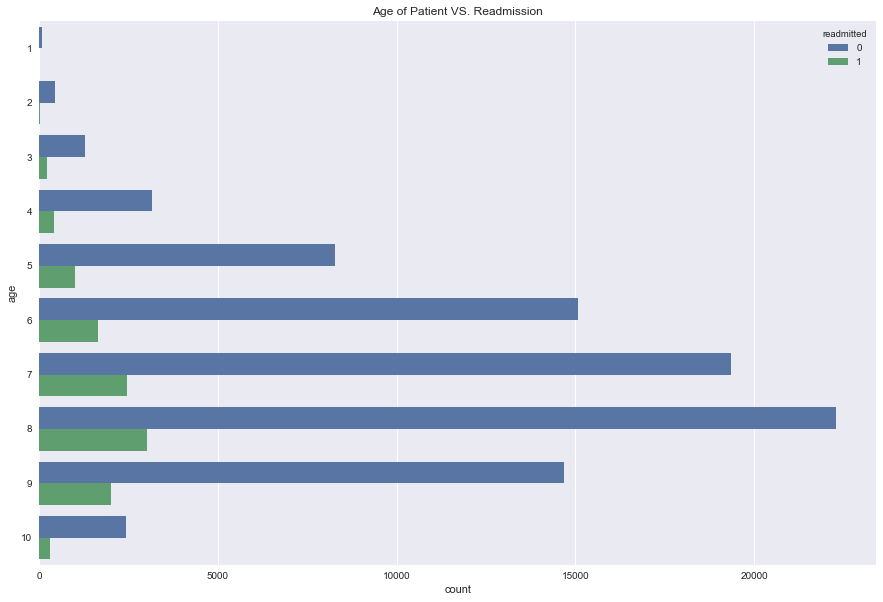

In [57]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

#### Number of medication used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

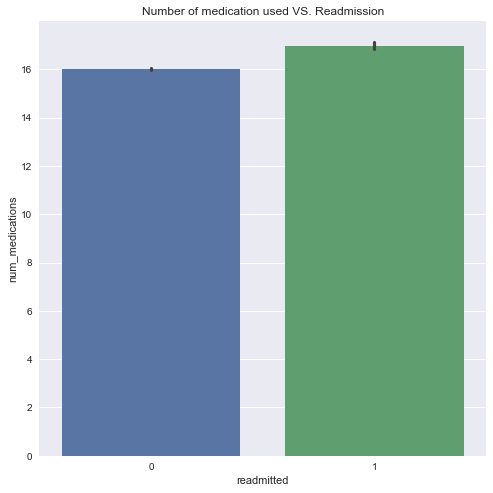

In [58]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

#### Change of Medication and Readmission

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

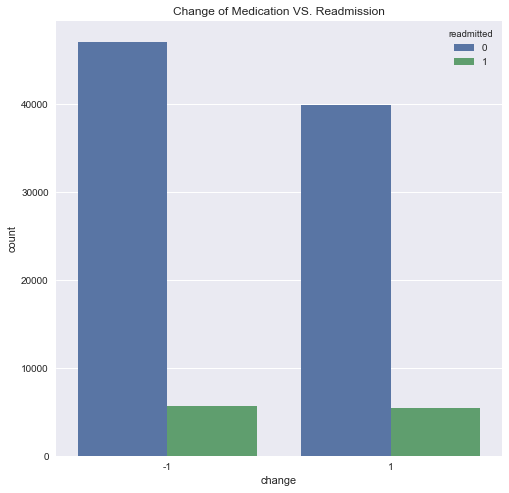

In [59]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

Change = 1
No Change = 0

#### Diabetes Medication prescribed and Readmission

Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
Values: “yes” : 1 “no” : 0

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

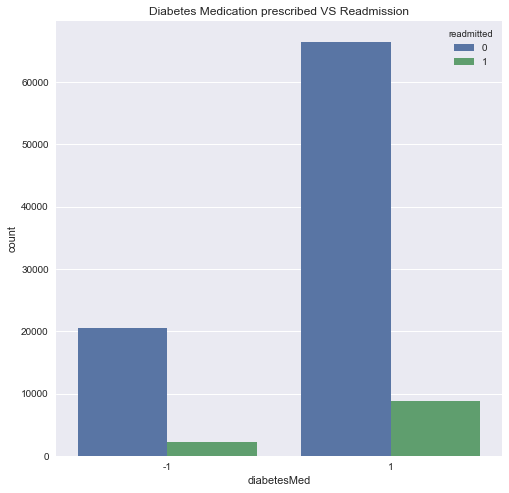

In [60]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

#### Glucose serum test result and Readmission

Glucose Serum test - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

'>200' : 1 = indicates diabetes
'>300' : 1 = Indicates diabetes
'Norm' : 0 = Normal
'None' : -99 = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

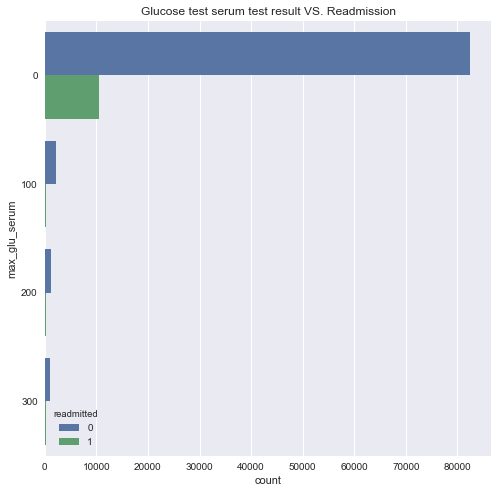

In [61]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

#### A1C result and Readmission

A1C test - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.

'>7' : 1
'>8' : 1
Norm : 0 = Normal
None : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

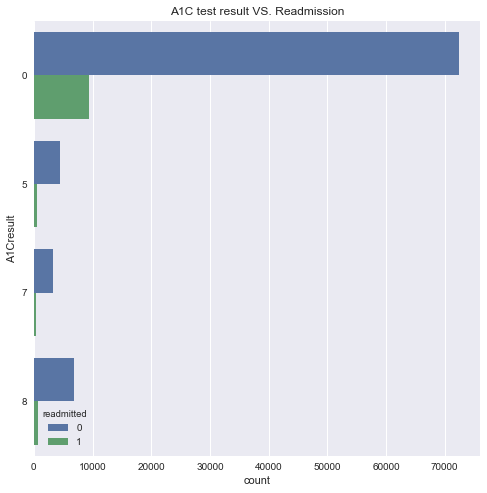

In [62]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')

#### Number of lab procedure and Readmission

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

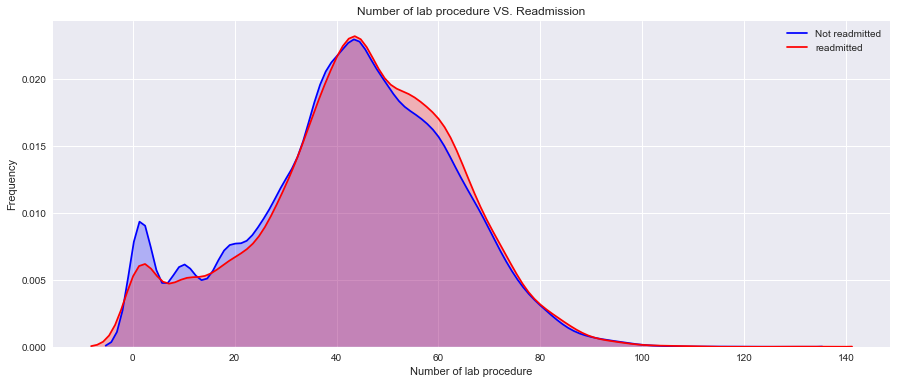

In [63]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

## Premodelling data-processing

#### Age

This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that information by treating it as a simple categorical variable

In [64]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())

8     25305
7     21809
9     16702
6     16697
5      9265
4      3548
10     2717
3      1478
2       466
1        65
Name: age, dtype: int64


Convert age categories to mid-point values

In [65]:

age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

75    25305
65    21809
85    16702
55    16697
45     9265
35     3548
95     2717
25     1478
15      466
5        65
Name: age, dtype: int64


Convert data type of nominal features in dataframe to 'object' type

In [66]:
df.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [67]:
df

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,15,3,59,0,18,0,0,0,9,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,25,2,11,5,13,2,0,1,6,0,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,35,2,44,1,16,0,0,0,7,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,45,1,51,0,8,0,0,0,5,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0
5,55,3,31,6,16,0,0,0,9,0,...,-20,0,-20,-20,-20,-20,-20,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,75,3,51,0,16,0,0,0,9,0,...,-20,-10,-20,-20,-20,-20,-20,1,1,0
101762,85,5,33,3,18,0,0,1,9,0,...,-20,0,-20,-20,-20,-20,-20,-1,1,0
101763,75,1,53,0,9,1,0,0,13,0,...,-20,-10,-20,-20,-20,-20,-20,1,1,0
101764,85,10,45,2,21,0,0,1,9,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0


In [68]:
df.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Train and Test

In [69]:
features=['age', 'time_in_hospital', 'num_lab_procedures','max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']


In [70]:
X=df[features]
y=df['readmitted']

## Logistic Regression

In [71]:
df['readmitted'].value_counts()

0    86986
1    11066
Name: readmitted, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1')
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,3335,3335
1,416,416
All,3751,3751


Readmitted:1
Not Readmitted:0

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))
print("F1 is {0:.2f}".format(f1_score(y_test, logit_pred)))


Accuracy is 0.89
Precision is 0.00
Recall is 0.00
F1 is 0.00


In [75]:


from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 69595, 1: 8846})
New dataset shape Counter({0: 69595, 1: 69595})


In [76]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1')
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7589,6252,13841
1,6310,7687,13997
All,13899,13939,27838


In [78]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))
print("f1 is {0:.2f}".format(f1_score(y_test, logit_pred)))


accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)
f1score_logit = f1_score(y_test, logit_pred)

Accuracy is 0.55
Precision is 0.55
Recall is 0.55
f1 is 0.55


## Random Forest

In [79]:
X = df[features]
y = df['readmitted']

In [80]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 86986, 1: 11066})
New dataset shape Counter({0: 86986, 1: 86986})


In [81]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11412,5832,17244
1,3615,13936,17551
All,15027,19768,34795


In [83]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))
print("f1 is {0:.2f}".format(f1_score(y_test, rm_prd)))


accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)
f1score_rm = f1_score(y_test, rm_prd)

Accuracy is 0.73
Precision is 0.70
Recall is 0.79
f1 is 0.75


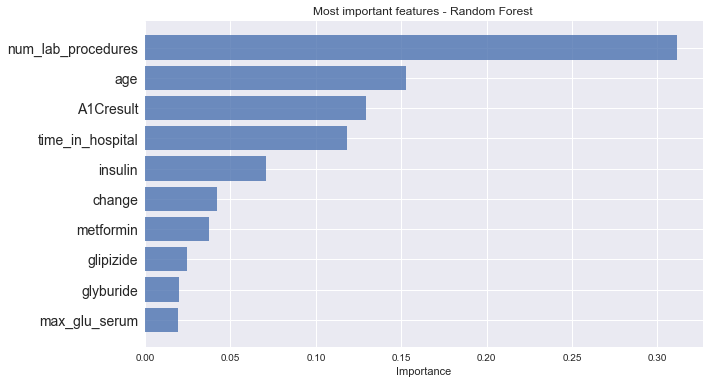

In [84]:
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

## Decision tree

In [85]:
X = df[features]
y = df['readmitted']
df['readmitted'].value_counts()

0    86986
1    11066
Name: readmitted, dtype: int64

In [86]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 86986, 1: 11066})
New dataset shape Counter({0: 86986, 1: 86986})


In [87]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=28,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10702,6542,17244
1,4031,13520,17551
All,14733,20062,34795


In [90]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))
print("f1 is {0:.2f}".format(f1_score(y_test, dtree_pred)))


accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)
f1score_dtree = f1_score(y_test, dtree_pred)

Accuracy is 0.70
Precision is 0.67
Recall is 0.77
f1 is 0.72


               Feature  Importance
12           glyburide    0.021306
3        max_glu_serum    0.022680
11           glipizide    0.026078
5            metformin    0.033750
26              change    0.036215
20             insulin    0.079868
4            A1Cresult    0.102964
1     time_in_hospital    0.139892
0                  age    0.183006
2   num_lab_procedures    0.272747


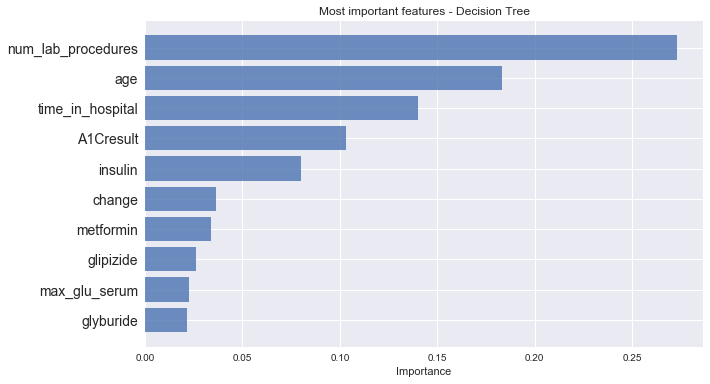

In [91]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

### K-Nearest neighbour

In [92]:
X = df[features]
y = df['readmitted']
df['readmitted'].value_counts()

0    86986
1    11066
Name: readmitted, dtype: int64

In [93]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 86986, 1: 11066})
New dataset shape Counter({0: 86986, 1: 86986})


In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [95]:
knn_pred = knn.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(knn_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11839,5405,17244
1,3424,14127,17551
All,15263,19532,34795


In [97]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, knn_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, knn_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, knn_pred)))
print("f1 is {0:.2f}".format(f1_score(y_test, knn_pred)))


accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)
f1score_knn = f1_score(y_test, knn_pred)

Accuracy is 0.75
Precision is 0.72
Recall is 0.80
f1 is 0.76


## Model Comparison 

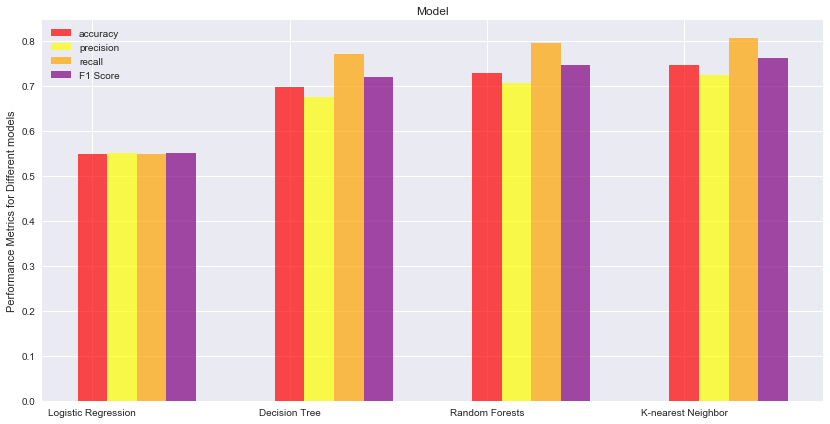

In [105]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests','K-nearest Neighbor']
values = [accuracy_logit, accuracy_dtree, accuracy_rm, accuracy_knn]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'K-nearest Neighbor']
values = [precision_logit, precision_dtree, precision_rm,precision_knn]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'yellow', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests','K-nearest Neighbor']
values = [recall_logit, recall_dtree, recall_rm, recall_knn]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'recall')
plt.xticks(model, models)

ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'K-nearest Neighbor']
values = [f1score_logit, f1score_dtree, f1score_rm,f1score_knn]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'purple', label = 'F1 Score')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           